<h1 style="text-align: center;" markdown="1"> Car Features' Effects on Gas Mileage </h1>

<h2 style="text-align: center;" markdown="1"> ECON320 Lab </h2>

<h3 style="text-align: center;" markdown="1"> Jay Chen, Gavin Mason, Jessica Min, Hung Ngo </h3>

## Package Setup

In [1]:
#load packages
!pip install stargazer
import scipy.stats as stats
from IPython.core.display import HTML
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy.optimize import minimize
from datetime import datetime
import plotly as plty
from stargazer.stargazer import Stargazer
from pandas_profiling import ProfileReport
from statsmodels.stats.outliers_influence import variance_inflation_factor
from IPython.display import Image

ModuleNotFoundError: No module named 'plotly'

## Table of Contents
* [Introduction and Motivation](#anchor1)
* [Data and Decriptive Statistics](#anchor2)
* [Methodology and Empirical Model](#anchor3)
* [Data Analysis & Results](#anchor4)
* [Conclusion](#anchor5)
* [References](#anchor6)

## Introduction and Motivation<a class="anchor" id="anchor1"></a>

### Research question: What specific production factors of a vehicle have the largest overall impact on the miles per gallon rate?

According to the Environmental Protection Agency (EPA), the tailpipe Carbon-Dioxide emissions exerted by the combustion of a single gallon of gasoline is measured at 8,887 grams of CO2/gallon. The total emissions of automobiles and trucks was recorded by the EPA as accounting for half of the emissions that serve as ozone precursors, VOCs and NOx, and up to 90% of total CO emissions in urban areas. Due to the fact that 95% of the world's transportation relies on the burning of fossil fuels, it’s no surprise that the transportation sector as a whole accounts for 14% of global CO2 emissions and 27% of US CO2 emissions. 

Carbon Dioxide is relevant to measure as it plays the most important role out of all greenhouse gasses: an assortment of naturally occurring gaseous elements that rest in the atmosphere. These gasses serve an integral purpose through the “greenhouse effect”, a warming component of global temperatures as the gasses absorb heat radiated from the Earth’s surface and then redistribute it across all directions. Without Carbon Dioxide, Earth’s greenhouse effect would be too weak to maintain an average global temperature above freezing. However, increased atmospheric CO2 can have equally disastrous effects on the climate as a higher average global temperature directly equates to increased extinction rates, natural disasters, and decreased agricultural production. 

In [2]:
Image(url= "https://www.datacamp-workspace.com/proxy/absolute/3b40891c-e327-4d25-b22b-7854de3a4666/files/graph1.jpg?1670292845788", width=500, height=500)

NameError: name 'Image' is not defined

Signed in 2015 by 196 parties, the Paris Agreement aims to limit global warming through the reduction of overall greenhouse gas emissions with the hopes of reaching global peaking of emissions as soon as possible to achieve a climate neutral world by the mid 21st century. With the transportation industry being the second highest emitter of global CO2 emissions, and with cars and trucks accounting 75% of all transportation sector emissions, it's important to research what contributes the most to these emissions and what factors can limit them. To date, human caused emissions are responsible for increasing atmospheric CO2 density by 50%. 

Automobile mile per gallon (mpg) data serves as an excellent indicator for a specific car model’s effect on CO2 emissions, as a higher mpg vehicle will have lower emissions as it burns fossil fuels at lower rates. Our project aims to promote a cleaner and more stable climate as we will be analyzing what specific mechanical and contextual variables have the most pronounced effect on mpg rates. Determining what production factors play the largest roles in fuel-efficiency will give an indication as to the manner in which future vehicle manufacturing trends should head. 

In [3]:
Image(url= "https://www.datacamp-workspace.com/proxy/absolute/3b40891c-e327-4d25-b22b-7854de3a4666/files/graph2.jpg?1670292845788", width=500, height=500)

NameError: name 'Image' is not defined

## Data and Descriptive Statistics<a class="anchor" id="anchor2"></a>

We will be using a dataset sourced from University of California Irvine's Machine Learning Depository database. The dataset consists of 398 total observations, 8 variables, and one column of strings that are unique to each observation. Out of these 8 variables, the dependent variable will be vehicle city-cycle MPG, with 7 independent variables based on each car model: cylinders (multi-valued discrete), displacement (continuous), horsepower (continuous), weight in lbs (continuous), acceleration in seconds to reach 60mph (continuous), model year in the 1900s (multi-valued discrete), and country of origin (multi-valued discrete). 

The power a vehicle's engine generates is measured in horsepower. 1 horselower is the amount of power power needed to move 550 pounds for 1 foot in 1 second or the amount of power needed to move 33,000 pounds for 1 foot in 1 minute. 

The higher the displacement, the more air that can be pushed into the cylinders of a vehicle, which boosts the combustion process and allows the engine to generate more power.

As a rule of thumb, the more cylinders in a vehicle, the more power is produced. Most cars have a 4, 6, or 8 cylinders.


The dataset consists only of a population of cars manufactured between 1970-1982. Ever since the EPA began a more intense surveillance of vehicular emissions, it's true that cars have seen a slight but steady decline in terms of their overall emissions.  However, this dataset will still hold as relevant to contemporary vehicles due to the nature of our research question. Since we are analyzing a research question of what mechanical or geographical components have the largest effect on a vehicle's city-cycle MPG, the fact that cars have shown trends towards increased efficiency is mostly irrelevant to our focus. 

In [4]:
# import data and load into DataFrame
data = pd.read_csv('AutoDataClean.csv')
data = pd.DataFrame(data)
# let's see if our the attributes of our data have their predicted type
data.info()

FileNotFoundError: [Errno 2] No such file or directory: 'AutoDataClean.csv'

### Cleaning up the data -- "origin" and "name"

In [78]:
# the car model is the only outlier, and we can truthfully drop it from our data as we are only concerned with the specific, quantitative variables
data = data.drop('name',axis=1)
# let's do the same with variable "origin" 
data = data.drop('origin',axis=1)
# visualising summary statistics across measurable variables
data.describe().round(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,104.171,2970.425,15.568,76.010
std,7.816,1.701,104.270,38.363,846.842,2.758,3.698
min,9.000,3.000,68.000,46.000,1613.000,8.000,70.000
25%,17.500,4.000,104.250,75.000,2223.750,13.825,73.000
50%,23.000,4.000,148.500,92.500,2803.500,15.500,76.000
75%,29.000,8.000,262.000,125.000,3608.000,17.175,79.000
max,46.600,8.000,455.000,230.000,5140.000,24.800,82.000


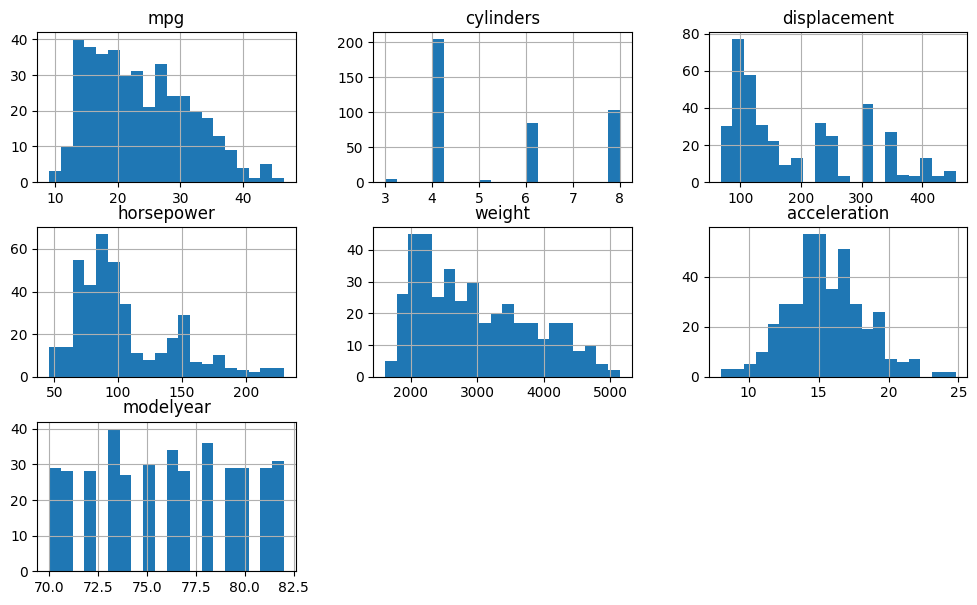

In [79]:
# let's better visualize the frequency of these attributes
data.hist(figsize=(12,7),bins=20)
plt.show()

Further descriptive statistics:

In [90]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Note that the average mpg of the samples in the data set is 23.5, with min of 9 and max of 46.6.

The correlation graph indicates that some variables correlates strongly with each other and violate the non-multicollinearity principle. We will address this issue in the Data Analysis & Results section. 

## Methodology and Empirical Model<a class="anchor" id="anchor3"></a>

Our population model is:
$$\begin{equation}
mpg = b_0 + b_1*cy + b_2*dis + b_3*hor + b_4*we + b_5*acc + b_6*my + u
\end{equation}
$$

Whereas our estimation model:
$$\begin{equation}
mpg = \widehat{b_0} + \widehat{b_1}*cy + \widehat{b_2}*dis + \widehat{b_3}*hor + \widehat{b_4}*we + \widehat{b_5}*acc + \widehat{b_6}*my
\end{equation}
$$

Where 
mpg: miles per gallon,
 cy: cylinders,
 dis: displacement, 
 hor: horsepower, 
 we: weight, 
 acc: acceleration, 
 my: model year,


To deal with the greenhouse effect, we want to have higher miles per gallon which will lessen the amount of emitted greenhouse gases. Through our model, we will explore what significantly impacts the miles per gallon (mpg) among our six independent variables. Thus, we can suggest alternatives to increase the value of mpg which, as a result, will slow down climate change globally. 

To measure the dependent variable as a product of the indepdent variables, we will use a log-level equation. We are curious about how a unit change in each independent variable corresponds to the percent change in the dependent variable. From that result, we will know which independent variables affect mpg the most and in what manner.

Thus, we have our First Regression Equation:

$$\begin{equation}
ln(mpg) = \widehat{b_0} + \widehat{b_1}*cy + \widehat{b_2}*dis + \widehat{b_3}*hor + \widehat{b_4}*we + \widehat{b_5}*acc + \widehat{b_6}*my
\end{equation}
$$

### Hypotheses

Our null hypothesis is that cylinders, horsepower, acceleration or model year have no statistically significant effect on the miles per gallon rate. Our alternative hypothesis is that cylinders, horsepower, acceleration or model year have a statistically significant effect on the miles per gallon rate. We do not hypothesize for weight and displacement as they will later be removed from the regression due to issues of multicollinearity. A detailed explanation is included in the [Data Analysis & Results](#anchor4) section.

Cylinders  
Null: The number of cylinders in a vehicle has no statistically significant effect on the miles per gallon rate.  
Alternative: The number of cylinders in a vehicle has a statistically significant effect on the miles per gallon rate.  
   
Horsepower  
Null: The amount of horsepower in a vehicle has no statistically significant effect on the miles per gallon rate.  
Alternative: The amount of horsepower in a vehicle has a statistically significant effect on the miles per gallon rate.  
    
Acceleration  
Null: The acceleration speed of a vehicle has no statistically significant effect on the miles per gallon rate.  
Alternative: The acceleration speed of a vehicle has a statistically significant effect on the miles per gallon rate.  
  
Model Year  
Null: The model year of a vehicle has no statistically significant effect on the miles per gallon rate.  
Alternative: The model year of a a vehicle has a statistically significant effect on the miles per gallon rate.  

We also expect the result to be as follows:
1. As the amount of cylinders and horsepower increase, the miles per gallon rate will decrease.
2. As the acceleration and model year increases, the miles per gallon rate will increase.

## Data Analysis & Results <a class="anchor" id="anchor4"></a>

#### First Regression Equation

$$\begin{equation}
ln(mpg) = \widehat{b_0} + \widehat{b_1}*cy + \widehat{b_2}*dis + \widehat{b_3}*hor + \widehat{b_4}*we + \widehat{b_5}*acc + \widehat{b_6}*my
\end{equation}
$$

In [82]:
reg1 = smf.ols(formula='np.log(mpg) ~ cylinders + displacement + horsepower + weight + acceleration + modelyear', 
              data=data).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     454.3
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          8.42e-173
Time:                        03:40:09   Log-Likelihood:                 278.62
No. Observations:                 398   AIC:                            -543.2
Df Residuals:                     391   BIC:                            -515.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8403      0.167     11.027      0.000       1.512       2.168
cylinders       -0.0214      0.012     -1.835      0.067      -0.044       0.002
displacement     0.0003      0.000      1.071      0.285      -0.000       0.001
horsepower      -0.0010      0.000     -2.137      0.033      -0.002   -8.23e-05
weight          -0.0003   2.35e-05    -11.368      0.000      -0.000      -0.000
acceleration    -0.0015      0.004     -0.427      0.670      -0.009       0.005
modelyear        0.0296      0.002     16.081      0.000       0.026       0.033
==============================================================================
Omnibus:                        5.433   Durbin-Watson:                   1.635
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                7.419
Skew:                          -0.040   Prob(JB):                       0.0245
Kurtosis:                       3.664   Cond. No.                     8.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Condition number is a measurement of the sensitivity of our model as compared to the size of changes in the data it is analyzing. Multicollinearity is strongly implied by a high condition number, and our regression equation has a condition number of 8.51e+04. Multicollinearity a term to describe two or more independent variables that are strongly related to each other and are falsely affecting our predicted variable by redundancy. Thus, let's properly test.

#### Testing for Multicollinearity

In [83]:
cormat = data[["mpg",  "cylinders",  "displacement",  "horsepower",  "weight",  "acceleration", 'modelyear']]

corr = cormat.corr().round(decimals=2)
corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear
mpg,1.00,-0.78,-0.80,-0.78,-0.83,0.42,0.58
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37
horsepower,-0.78,0.84,0.90,1.00,0.86,-0.69,-0.42
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29
modelyear,0.58,-0.35,-0.37,-0.42,-0.31,0.29,1.00


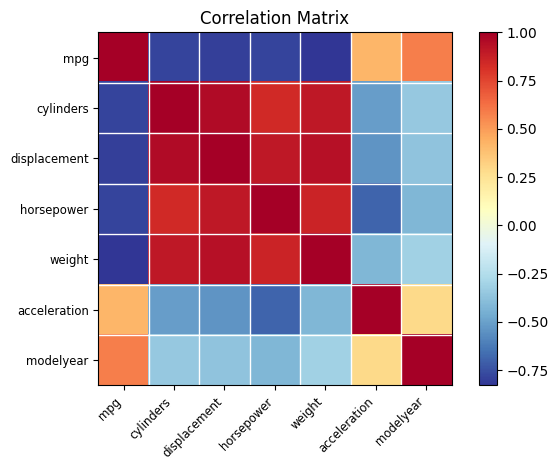

In [84]:
from statsmodels.graphics.correlation import plot_corr
fig=plot_corr(corr,xnames=corr.columns)


MPG is strongly correlated with cylinders, displacement, horsepower and weight. An increase in these variables' values equals a decrease in the mileage per gallon which seems logically sound: a heavy vehicle with a powerful engine and great horsepower would presumably consume more energy, thus the low mileage per gallon

The displacement, horsepower, weight, and cylinders all have a strong positive correlation, violating the non-multicollinearity assumption of Linear Regression. Let's use a VIF table to better examine for multicollinearity.

In [85]:
v = data[["mpg",  "cylinders",  "displacement",  "horsepower",  "weight",  "acceleration", 'modelyear']].copy()
v['Intercept'] = 1
vif = pd.DataFrame()
vif["Variable Names"] = v.columns
vif["VIF"] = [variance_inflation_factor(v.values, i) for i in range(v.shape[1])]
vif=round(vif,3)
display(vif)

,Variable Names,VIF
0,mpg,5.227
1,cylinders,10.627
2,displacement,19.772
3,horsepower,9.160
4,weight,13.583
5,acceleration,2.598
6,modelyear,1.913
7,Intercept,771.579


As we can see, the VIF is quite high (>10) for our variables, so let's get rid of columns that highly correlate with eachother and recheck for multicollinearity.

In [86]:
newdata = data.drop(['displacement','weight'],axis=1)

v1 = newdata[["mpg", "cylinders", "horsepower",  "acceleration", 'modelyear']].copy()
v1['Intercept'] = 1
vif1 = pd.DataFrame()
vif1["Variable Names"] = v1.columns
vif1["VIF"] = [variance_inflation_factor(v1.values, i) for i in range(v1.shape[1])]
vif1=round(vif1,3)
display(vif1)

,Variable Names,VIF
0,mpg,3.984
1,cylinders,4.070
2,horsepower,5.974
3,acceleration,2.078
4,modelyear,1.592
5,Intercept,684.265


We have gotten rid of the multicollinearity, now lets run our regression on the remaining predictor variables.

#### Regression Equation 2

In [87]:
reg = smf.ols(formula='np.log(mpg) ~ + horsepower + acceleration + cylinders + modelyear', 
              data=newdata).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     468.6
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          4.44e-148
Time:                        03:41:09   Log-Likelihood:                 214.30
No. Observations:                 398   AIC:                            -418.6
Df Residuals:                     393   BIC:                            -398.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.3932      0.186     12.842      0.000       2.027       2.760
horsepower      -0.0045      0.000    -10.652      0.000      -0.005      -0.004
acceleration    -0.0227      0.004     -6.253      0.000      -0.030      -0.016
cylinders       -0.0786      0.008    -10.007      0.000      -0.094      -0.063
modelyear        0.0258      0.002     12.153      0.000       0.022       0.030
==============================================================================
Omnibus:                        6.894   Durbin-Watson:                   1.486
Prob(Omnibus):                  0.032   Jarque-Bera (JB):                7.035
Skew:                           0.254   Prob(JB):                       0.0297
Kurtosis:                       3.408   Cond. No.                     3.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The remaining size of the condition number is presumably between a single covariate and the intercept, which should be irrelevant to our model.

In [49]:
models = Stargazer([reg1, reg])
HTML(models.render_html())

Based on the results in the table above, removing the Displacement and Weight variables only slightly increased the Intercept. The coefficients for the remaining variables also saw slight changes, with cylinders seeing the most drastic transformation. The R^2, adjusted R^2 and Std. Error also very slightly changed between the two equations. 

### Testing for Heteroskedasticity 

Now lets check for heteroskedasticity in our second equation with a Residuals vs. Fitted Variables Plot.

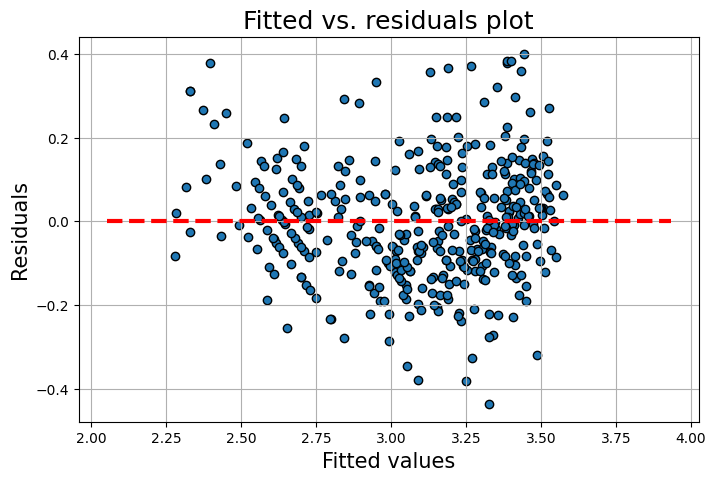

In [91]:
plt.figure(figsize=(8,5))
p=plt.scatter(x=reg.fittedvalues,y=reg.resid,edgecolor='k')
xmin=min(reg.fittedvalues)
xmax = max(reg.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Fitted values",fontsize=15)
plt.ylabel("Residuals",fontsize=15)
plt.title("Fitted vs. residuals plot",fontsize=18)
plt.grid(True)
plt.show()

Fair bit of coning in the residual plot indicating heteroskedasticity, but let's test for it.

The general linear model requires an assumption of homoskedasticity, or that the variance of the error terms is not related to the regressors:

$$Var(u|x_1, ..., x_k)=\sigma^2.$$ 

**Null Hypothesis:** $$H_0: Var(u|x_1, ..., x_k)=\sigma^2.$$

**Alternative Hypothesis:** The variance is not constant, and heteroskedasticity is present.

If homoskedasticity is violated, then the standard errors are invalid. 

In [68]:
from statsmodels.compat import lzip
test = sms.het_breuschpagan(reg.resid, reg.model.exog)
name = ['Lagrange Multiplier statistic', 'p-value', 'f-value', 'f p-value']
pd.DataFrame(lzip(name, test))

,0,1
0,Lagrange Multiplier statistic,10.835978
1,p-value,0.028471
2,f-value,2.749829
3,f p-value,0.027997


P-value is .028, which is less than the Critical Value of .05% within the Breusch Pagan test. Thus, we do not violate the assumption of homoskedasticity. 

### Testing for Normality

Another assumption that is necessary towards a linear regression model is normality in our residuals. 

In [70]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 800x500 with 0 Axes>

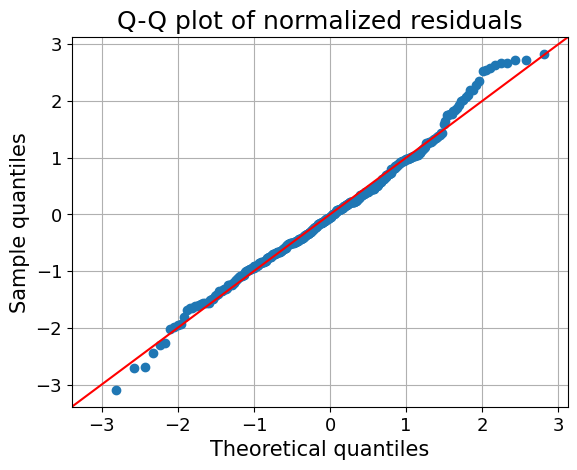

In [71]:
plt.figure(figsize=(8,5))
fig=qqplot(reg.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

The above graph seems to imply that our residuals follow a fairly normal distribution, however there is a statistical discrepancy at the end of the graph. Let's visualize our distribution in another way.

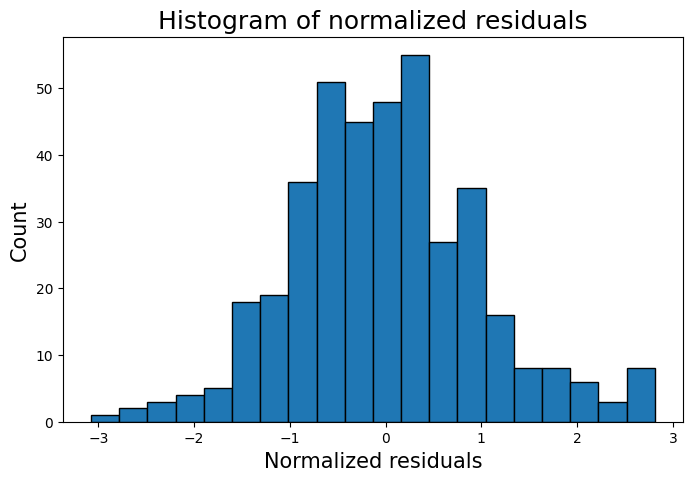

In [73]:
plt.figure(figsize=(8,5))
plt.hist(reg.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

The residuals seem to follow the normal distribution fairly accurately, and we will continue on with this assumption.

### Statistical Testing

In [52]:
models1 = Stargazer([reg])

HTML(models1.render_html())

From the table above, our regression equation shows an R^2 of .827, meaning we've managed to account for 82.7% of the determinants on the dependent variable's variance as it appears that Acceleration, Cylinders, Horsepower, and Model Year are in fact statistically significant regressors in the regression equation. However, let's test our original hypothesis just to confirm.

This test determines whether all of our explanatory variables are jointly signficant to our regression model. 

Null and alternative hypotheses:

$H_0:\beta_1, \beta_2, \beta_3, \beta_4 = 0$ 

$H_1:\beta_1, \beta_2, \beta_3, \beta_4 \neq 0$


In [93]:
hypothesis = ['acceleration = 0', 'cylinders = 0', 'horsepower = 0', 'modelyear = 0']
ftest = reg.f_test(hypothesis)
fstat = ftest.statistic
fpval = ftest.pvalue
print(f'Fstat: {np.around(fstat, 5)}\n')
print(f'Fpval: {np.around(fpval, 5)}\n')

cv = stats.f.ppf(1 - 0.01, 4, 393)
print("The critical value for the F statistic at 1% significance level is", cv)

Fstat: 468.62206

Fpval: 0.0

The critical value for the F statistic at 1% significance level is 3.3672006012371023


Based on the above p value of 0.0, we reject the null hypothesis in favor of the alternative hypothesis, meaning that the variables are jointly significant and have a statistical impact on the regression and dependent variable.

# Conclusion

Cylinders, horsepower, acceleration, and model year are statistically significant for critical value: $$\alpha = 0.01$$

Based on the above p value of 0.0, we can reject the null hypothesis in favor of the alternative hypothesis, which means that the variables are jointly significant and their impact on the dependent variable is greater than zero.

From our analysis, we conclude that cylinders, horsepower, acceleration, and model year have a statistically significant effect on the miles per gallon rate. We reject the null hypotheses that cylinders, horsepower, acceleration, or model year have no statistically significant effect on the miles per gallon rate. 
  
This conclusion makes sense because the variables we tested are the specifications of a car that affect energy usage the most. An increase in cylinders and horsepower would allow a vehicle to travel faster but uses more fuel. A lower acceleration time means the vehicle is faster and able to go from 0 to 60 mph in a shorter time span which will cause an increase in fuel usage. Finally, newer models of vehicles will take advantage of better technology that allows them to be more fuel efficient.  
  
Our testing showed that for every additional cylinder in a vehicle, the number of miles per gallon decreased by 7.9%. For every increase in horsepower, miles per gallon decreased by 0.5%. For every second increase in acceleration time, miles per gallon decreased by 2.3%. For every increase in model year, miles per gallon increased by 2.6%.    
  
With our research, we can see which factors affect gas mileage the most and push vehicle manufacturers to be more aware of their impact on the climate. We can see that cylinders had the greatest effect per one unit, but the vehicle data used only had vehicles ranging from 3-8 cylinders. Compare this to horsepower which ranged from 46-230. All of the factors had significant and varying effects on gas mileage and we as consumers should be aware of these factors. We can urge vehicle manufacturers to change or improve on these factors to reduce their carbon footprints. 

Although vehicle specifications play a significant part in determining gas mileage, human habits while driving are also a significant factor not accounted for. For example, city and highway driving causes a difference in gas mileage. You also consume more gas if you accelerate and brake often. We have analyzed vehicle factors in gas mileage, but there can be more research done to see how human elements affect gas mileage. In addition, it would be more relevant to have analyzed a more recent dataset on vehicles, as there have been huge leaps in technology and fuel efficiency over the last 30 years. 

## References<a class="anchor" id="anchor6"></a>

https://www.epa.gov/ghgemissions/inventory-us-greenhouse-gas-emissions-and-sinks

https://www.epa.gov/ghgemissions/sources-greenhouse-gas-emissions

https://www.climate.gov/news-features/understanding-climate/climate-change-atmospheric-carbon-dioxide

https://climate.nasa.gov/vital-signs/carbon-dioxide/

https://carbuzz.com/news/displacement-for-dummies-what-displacement-actually-is

https://www.kia.com/dm/discover-kia/ask/what-is-a-cylinder-in-a-car.html#:~:text=A%20cylinder%20is%20a%20vital,power%20that%20moves%20your%20vehicle

https://www.toyota.ca/toyota/en/connect/3887/what-is-horsepower#:~:text=Horsepower%20refers%20to%20the%20power,takes%20to%20do%20the%20work